In [1]:
import sys
sys.path.insert(0, '/root/mounted/projects/qpair/')

In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
from sample_data_set import *
from add_vectors_to_qpairs import add_wv_to_qpairs
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from config import *
MAKE_DATA_PATH = '/root/mounted/datasets/make_data/'
MAKE_PAIRS_SAMPLED_PATH = os.path.join(MAKE_DATA_PATH, 'intermediate')


In [4]:
def merge_f0_f1(f0_csv, f1_csv, q1='q1', q2='q2', sep = '\t'):
    df0 = pd.read_csv(f0_csv, sep=sep)
    df1 = pd.read_csv(f1_csv, sep=sep)
    
    return pd.concat([df0, df1], ignore_index=True)


f0_csv = os.path.join(MAKE_DATA_PATH, 'df0_max3.csv')
f1_csv = os.path.join(MAKE_DATA_PATH, 'df1_max9.csv')

f0_f1_merged =  merge_f0_f1(f0_csv, f1_csv)
f0_f1_merged[Q1_Q2_INTERSECT] = q1_q2_intersect(f0_f1_merged)

In [5]:
f0_f1_merged.corr()

,label,ok,q1_q2_intersect
label,1.000000,NaN,0.282405
ok,NaN,NaN,NaN
q1_q2_intersect,0.282405,NaN,1.000000


In [6]:
sampled_train, sampled_test = train_test_split(f0_f1_merged, 0.3)
sampled_train.columns = ['label', 'qid1', 'qid2', 'ok', 'q1_q2_intersect']
sampled_test.columns = ['label', 'qid1', 'qid2', 'ok', 'q1_q2_intersect']

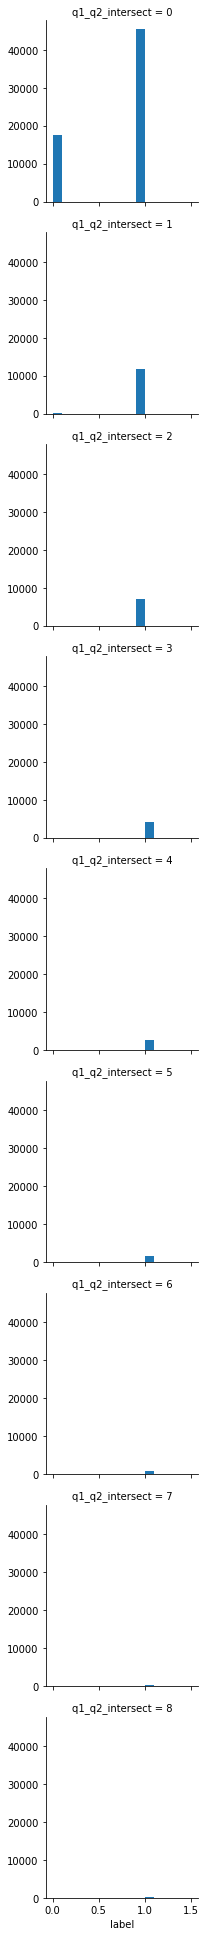

In [7]:
train_g = sns.FacetGrid(sampled_train, row='q1_q2_intersect')
train_g.map(plt.hist, 'label')

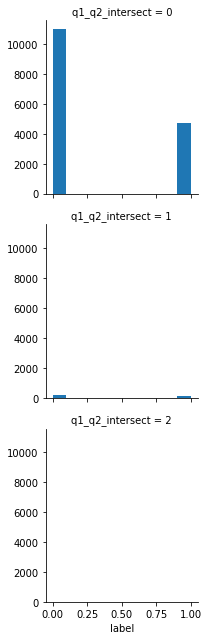

In [10]:
test_g = sns.FacetGrid(sampled_test, row='q1_q2_intersect')
test_g.map(plt.hist, 'label')

In [12]:
with open(QUESTION_PKL, 'rb') as f:
    qs = pickle.load(f)
    
with open(WEM_PKL, 'rb') as f:
    wmap = pickle.load(f)

w2i = wmap['word2index']

with open(CEM_PKL, 'rb') as f:
    cmap = pickle.load(f)

c2i = cmap['char2index']

In [13]:
MAKE_PAIRS_SAMPLED_TRAIN_CSV = os.path.join(MAKE_PAIRS_SAMPLED_PATH, 'make_pairs_sampled_train.csv')
MAKE_PAIRS_SAMPLED_TEST_CSV = os.path.join(MAKE_PAIRS_SAMPLED_PATH, 'make_pairs_sampled_test.csv')
MAKE_PAIRS_SAMPLED_WIDS_CIDS_TRAIN_PKL = os.path.join(MAKE_PAIRS_SAMPLED_PATH, 'make_pairs_sampled_wids_cids_train.pkl')
MAKE_PAIRS_SAMPLED_WIDS_CIDS_TEST_PKL = os.path.join(MAKE_PAIRS_SAMPLED_PATH, 'make_pairs_sampled_wids_cids_test.pkl')
sampled_wids_cids_train = add_wv_to_qpairs(sampled_train, qs, w2i, c2i)
sampled_wids_cids_test = add_wv_to_qpairs(sampled_test, qs, w2i, c2i)

In [14]:
sampled_train.to_csv(MAKE_PAIRS_SAMPLED_TRAIN_CSV, sep='\t', index=False)
sampled_test.to_csv(MAKE_PAIRS_SAMPLED_TEST_CSV, sep='\t', index=False)

with open(MAKE_PAIRS_SAMPLED_WIDS_CIDS_TRAIN_PKL, 'wb') as f:
    pickle.dump(sampled_wids_cids_train, f)

with open(MAKE_PAIRS_SAMPLED_WIDS_CIDS_TEST_PKL, 'wb') as f:
    pickle.dump(sampled_wids_cids_test, f)

In [15]:
sampled_train.shape, sampled_test.shape

((91258, 5), (16061, 5))